In [516]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1 - Load the data into a DataFrame

In [517]:
data = pd.read_csv('Admission_Predict.csv')

In [562]:
# View the data
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [519]:
# View the columns
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [520]:
# Looks like 'Chance of Admit' and 'LOR' have spaces after them, so we will rename them to remove the space
data.rename(columns = {'Chance of Admit ':'Chance of Admit', 'LOR ': 'LOR'}, inplace = True)

In [521]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

## Part 2 - Calculate mean GRE score of students with a chance of admission above 85%

In [564]:
# Option 1
gre_85 = data[data['Chance of Admit'] > .85].mean()['GRE Score']

# Option 2
gre_85_2 = data[data['Chance of Admit'] >.85]['GRE Score'].mean()

In [565]:
# Print both to make sure they are the same value
gre_85, gre_85_2

(331.144578313253, 331.144578313253)

In [563]:
# Mean score of GRE of  
data['GRE Score'].mean()

316.8075

## Part 3 - Calculate mean chance of attendance for students with Research experience

In [524]:
# Option 1 - select out studetns with research experience and calculate the mean of Chance of Admit for those students.
data[data['Research'] == 1]['Chance of Admit'].mean()

0.7959817351598172

In [525]:
# Option 2 using groupby to show the mean for students with research, and those without
data.groupby('Research')['Chance of Admit'].mean()

Research
0    0.637680
1    0.795982
Name: Chance of Admit, dtype: float64

In [566]:
# Calculate overall chance of admit
data['Chance of Admit'].mean()

0.7243499999999996

## Part 4 - Calculate the correlation coefficient between CGPA and Chance of Admission

In [526]:
# Option 1 - 'by hand' where I looked up the formula online and implemented it with code.
xy = data.CGPA * data['Chance of Admit']
x2 = data.CGPA**2
y2 = data['Chance of Admit']**2

((len(xy)*sum(xy)) - sum(data.CGPA)*sum(data['Chance of Admit'])) / np.sqrt( (len(x2)*sum(x2) - sum(data.CGPA)**2) * (len(y2)*sum(y2) - sum(data['Chance of Admit'])**2)  )

0.8732890993552173

In [527]:
# Option 2 - Use panda's library to calculate correlation coefficient
data.CGPA.corr(data['Chance of Admit'])

0.8732890993553001

## Part 5 - Plot a histogram of the chance of admission.
### What distribution does it seem to have

Text(0, 0.5, 'Count of Chance of Admission')

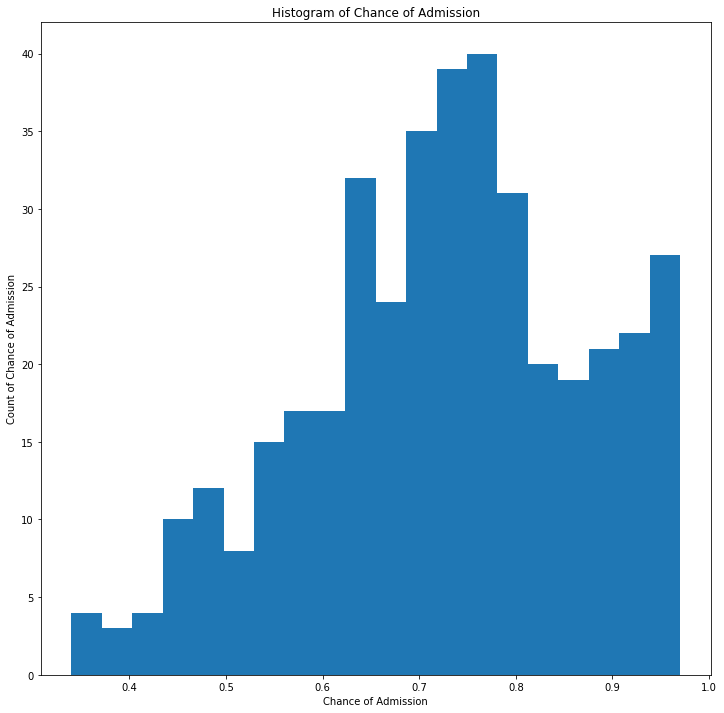

In [567]:
fig = plt.figure(figsize=(12,12)) # Set the size of teh figure

# Plot the histogram, with the number of bins set to the square root of the number of observations. This isn't scientific,
# but seems to work well in this case.
plt.hist(data['Chance of Admit'], bins = int(np.sqrt(len(data['Chance of Admit'])))) 

# Give the plot labels and titles
plt.title('Histogram of Chance of Admission')
plt.xlabel('Chance of Admission')
plt.ylabel('Count of Chance of Admission')

#### The data do not seem to be normally distributed. They are closer to a bimodel distribution, with a cluster around 70% and another around 95%.

## Part 6 - Calculate Mean and Standard Deviation of the chance of admission

In [529]:
# Calculate mean of chance of admission
data['Chance of Admit'].mean()

0.7243499999999996

In [530]:
# Calculate standard deviation of chance of admision - Option 1 - 'by hand' looking up theformula and implementing in python
np.sqrt(sum([(i - np.mean(data['Chance of Admit']))**2 for i in data['Chance of Admit']])/(len(data['Chance of Admit'])))

0.1424309569580995

In [531]:
# Calculate standard deviation of chance of admission - Option 2 using the numpy library
np.std(data['Chance of Admit'])

0.1424309569580995

## Part 7 - Plot a histogram of the CGPA

Text(0, 0.5, 'Count of CGPA Score')

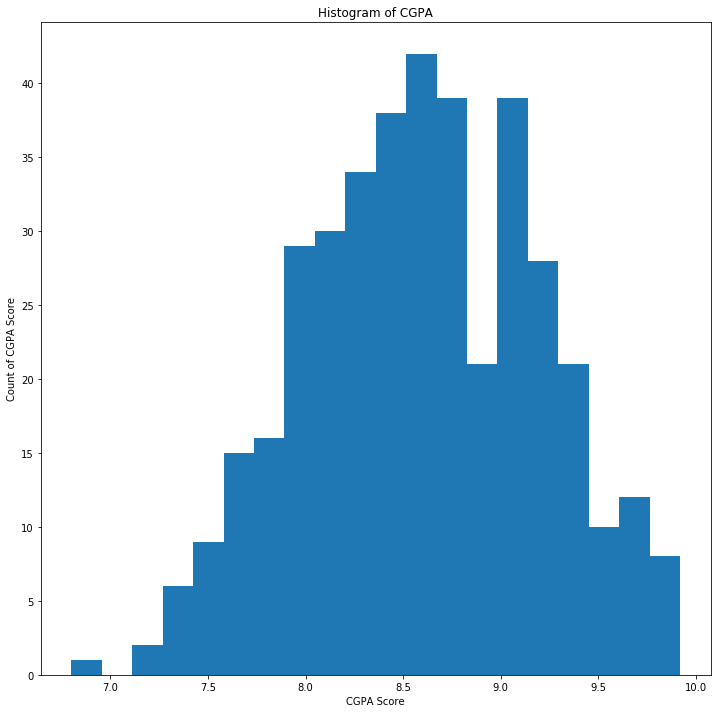

In [568]:
fig = plt.figure(figsize=(12,12))
plt.hist(data.CGPA, bins = int(np.sqrt(len(data.CGPA))))
plt.title('Histogram of CGPA')
plt.xlabel('CGPA Score')
plt.ylabel('Count of CGPA Score')

## Part 8 - Calculate the mean and standard deviation of the CGPA

In [533]:
# Calculate mean of chance of admission
data['CGPA'].mean()

8.598924999999998

In [534]:
# Calculate standard deviation of chance of admision - Option 1
np.sqrt(sum([(i - np.mean(data.CGPA))**2 for i in data.CGPA])/(len(data.CGPA)))

0.5955712336698271

In [535]:
# Calculate standard deviation of chance of admission - Option 2
np.std(data.CGPA)

0.5955712336698271

## Part 9 - Plot GRE vs Chance of Admission

Text(0, 0.5, 'Chance of Admission')

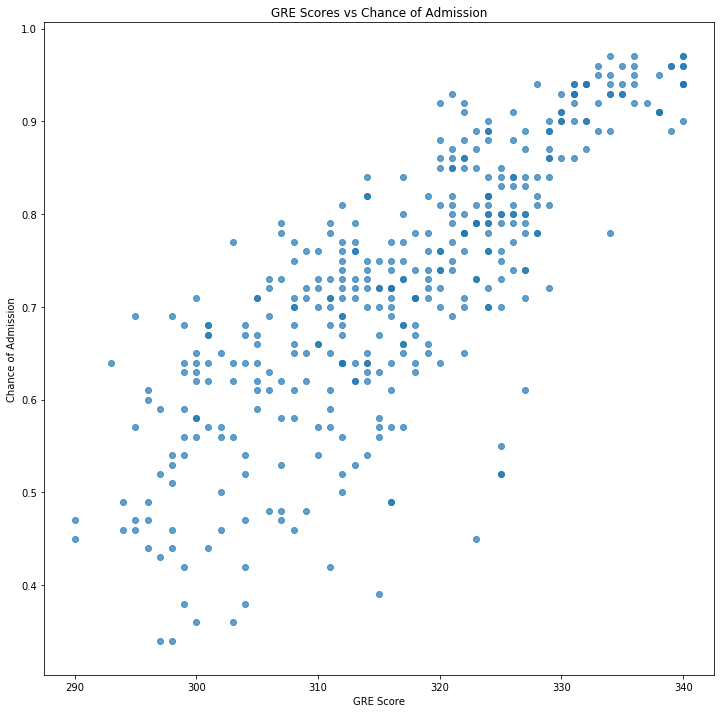

In [536]:
fig = plt.figure(figsize=(12,12))

# Plot a scatterplot of GRE Score on the x-axis against Chance of Admit on the y-axis. Set alpha to .7 so that 
# overlapping points appear darker (otherwise we see less data than we have because of overlap meaning same exact scores)
plt.scatter(data['GRE Score'], data['Chance of Admit'], alpha = .7)
plt.title('GRE Scores vs Chance of Admission')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admission')

## Part 9 - Calculate Correlation Coefficient between GRE and Chance of Admission

In [537]:
data['GRE Score'].corr(data['Chance of Admit'])

0.8026104595903503

## Part 10 - Plot TOEFL vs Chance of Admission

Text(0, 0.5, 'Chance of Admission')

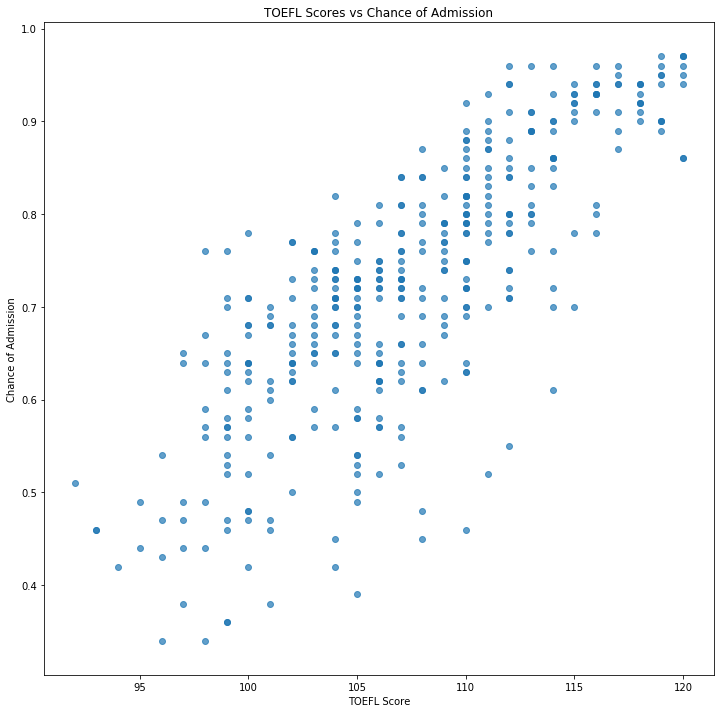

In [538]:
fig = plt.figure(figsize=(12,12))
plt.scatter(data['TOEFL Score'], data['Chance of Admit'], alpha = .7)
plt.title('TOEFL Scores vs Chance of Admission')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')

## Part 11 - Calculate the correlation coefficient between TOEFL and Chance of Admission

In [539]:
data['TOEFL Score'].corr(data['Chance of Admit'])

0.7915939869351044

## Part 12 - Plot CGPA vs Chance of Admission

Text(0, 0.5, 'Chance of Admission')

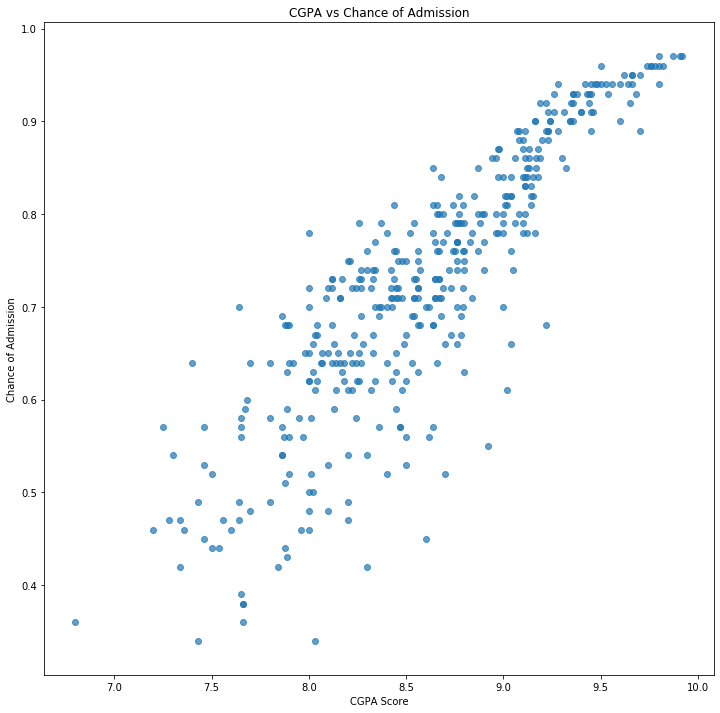

In [540]:
fig = plt.figure(figsize=(12,12))
plt.scatter(data['CGPA'], data['Chance of Admit'], alpha = .7)
plt.title('CGPA vs Chance of Admission')
plt.xlabel('CGPA Score')
plt.ylabel('Chance of Admission')

## Part 13 - Calculate the correlation coefficient between CGPA and Chance of Admission

In [541]:
data['CGPA'].corr(data['Chance of Admit'])

0.8732890993553001

## Part 14 - Plot one more graph that you think helps the analysis of the data

### Let's first look at how all the variables are related to each other - we have seen strong correlations between many of the variables, now it is time for a holistic look.

In [542]:
correlation_matrix = data.corr()
correlation_matrix.style.background_gradient(cmap='coolwarm').set_precision(1)
# Note: This article was instrumental in putting this together, and I copied some code from there.
# https://datascienceplus.com/visualize-correlation-matrices-in-python/
# Thanks to Kristian Larsen

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1,-0.1,-0.1,-0.2,-0.2,-0.09,-0.05,-0.06,0.04
GRE Score,-0.1,1,0.8,0.7,0.6,0.6,0.8,0.6,0.8
TOEFL Score,-0.1,0.8,1,0.7,0.7,0.6,0.8,0.5,0.8
University Rating,-0.2,0.7,0.7,1,0.7,0.7,0.7,0.4,0.7
SOP,-0.2,0.6,0.7,0.7,1,0.7,0.7,0.4,0.7
LOR,-0.09,0.6,0.6,0.7,0.7,1,0.7,0.4,0.7
CGPA,-0.05,0.8,0.8,0.7,0.7,0.7,1,0.5,0.9
Research,-0.06,0.6,0.5,0.4,0.4,0.4,0.5,1,0.6
Chance of Admit,0.04,0.8,0.8,0.7,0.7,0.7,0.9,0.6,1


### All variables (excluding Serial No. which is just an ID) are positively correlated with the Chance of Admission. This means that all of the information the admissions officers collect are positive attributes - they are not tracking things like the number of truancies, or number of arrests, which would likely have very little correlation or negative correlation. In other words, if a hypothetical applicant scored high on all of the variables, they would have a very high chance of getting in. 

### Of all the variables, CGPA is most strongly associated with Chance of Admit, while Research is the least strongly associated. In fact, Research is weakly correlated with most of the other varaibles: .6 is the strongest correlation. Let's see a combined look at CGPA and Research against Chance of Admission.

Text(0, 0.5, 'Chance of Admission')

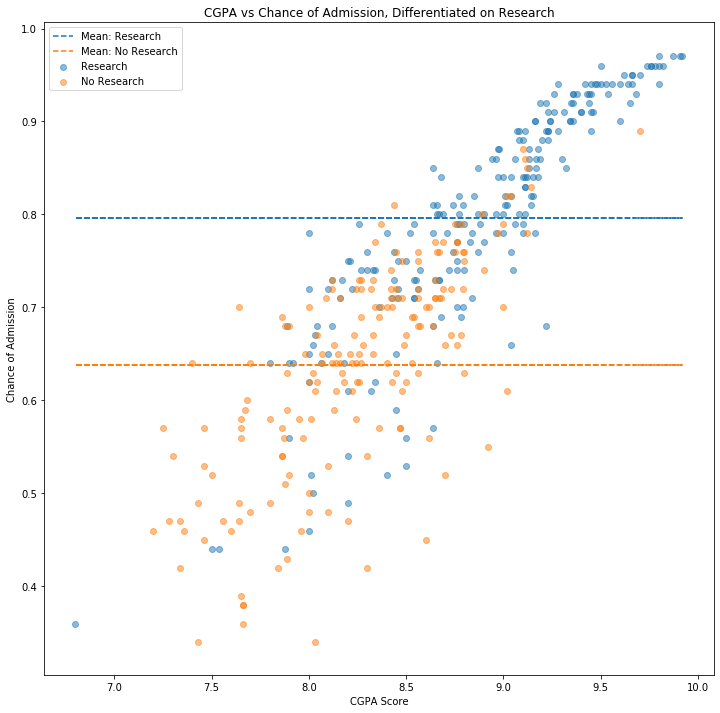

In [543]:
# Plot CGPA vs Chance of Admit, broken up by whether someone did research or not
fig,ax = plt.subplots(figsize=(12,12))

# Plot the data, setting the alpha level to .5 to see overlap, and giving labels to the points because they will be colored
cgparesearch = ax.scatter(data[data.Research == 1].CGPA, data[data.Research == 1]['Chance of Admit'], alpha = .5, label = 'Research')
cgpanoresearch = ax.scatter(data[data.Research == 0].CGPA, data[data.Research == 0]['Chance of Admit'], alpha = .5, label = 'No Research')

# Calculate averages and plot the average lines for whether they did research or not
y_mean = [np.mean(data[data.Research == 1]['Chance of Admit'])]*len(data.CGPA) # Line has to be as long as x axis
y_mean2 = [np.mean(data[data.Research == 0]['Chance of Admit'])]*len(data.CGPA) # line has to be as long as x axis
mean_line = ax.plot(data.CGPA,y_mean, label='Mean: Research', linestyle='--') # give labels and dotted lines
mean_line2 = ax.plot(data.CGPA, y_mean2, label='Mean: No Research', linestyle = '--') # give lables and dotted lines

# Plot legends and titles
legend = ax.legend(loc='upper left') # have a legend box (since now we have colors) and place it top left so it doesn't obscure things
plt.title('CGPA vs Chance of Admission, Differentiated on Research')
plt.xlabel('CGPA Score')
plt.ylabel('Chance of Admission')

### This chart shows a couple things: first, a stronger CGPA score is positively associated with a Chance of Admission, which we already know. Second, this chart shows that students who did not do research tended to have a lower CGPA. Next, let's look at University Rating and whether or not someone did research.

Text(0, 0.5, 'University Rating')

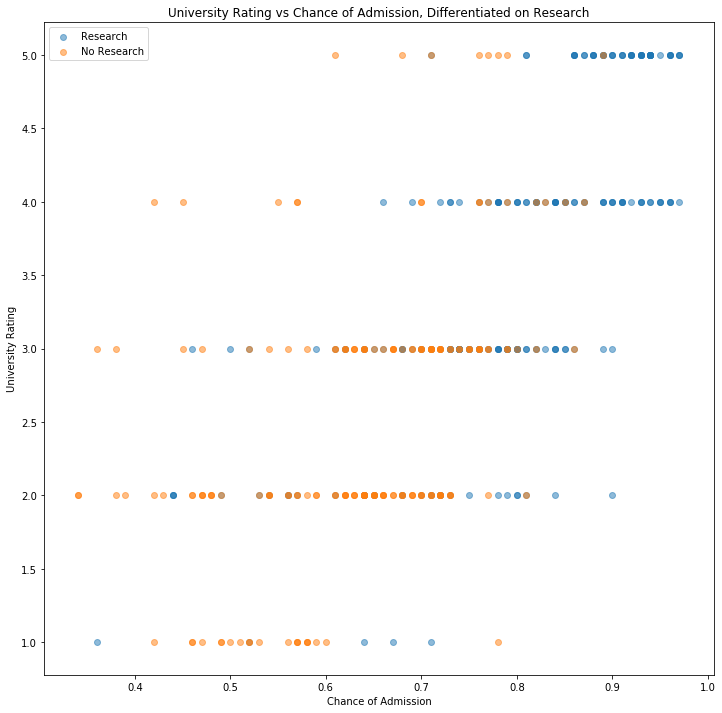

In [544]:
fig = plt.figure(figsize=(12,12))
plt.scatter(data[data.Research == 1]['Chance of Admit'], data[data.Research == 1]['University Rating'], alpha = .5, label = 'Research')
plt.scatter(data[data.Research == 0]['Chance of Admit'], data[data.Research == 0]['University Rating'], alpha = .5, label = 'No Research')

legend = plt.legend(loc='upper left')
plt.title('University Rating vs Chance of Admission, Differentiated on Research')
plt.xlabel('Chance of Admission')
plt.ylabel('University Rating')

### We can see from this chart, where Chance of Admission is now on the X-axis, that highly rated Universities had more people doing research. I would guess this is because highly rated Universities tend to have more funding, be research Universities, and be able to attract faculty that can help coordinate and supervise research activities. The overlapping dots make it difficult to assess how many students were involved in research at each University type, so let's examine that below.

Text(0, 0.5, '% Involved in Research')

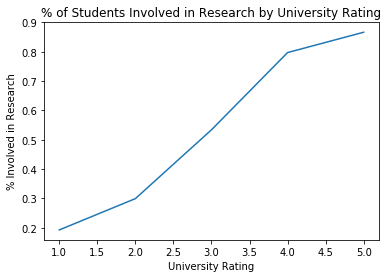

In [545]:
# Supplementary visualization to back up what we see above
# Calculating the average number of students involved in research by each level of unviersity rating
# using the groupby method
plt.plot(data.groupby('University Rating').Research.mean()) 
plt.title('% of Students Involved in Research by University Rating')
plt.xlabel('University Rating')
plt.ylabel('% Involved in Research')

### Clearly, students at better Universities were more involved in research.

### We have already seen that higher University Rating is positively correlated with Chance of Admission, but let's take a closer look. To make the view simpler, I will categorize university rating as 'Top-Tier', 'Middling' and 'Poor' 

Text(0, 0.5, 'Chance of Admission')

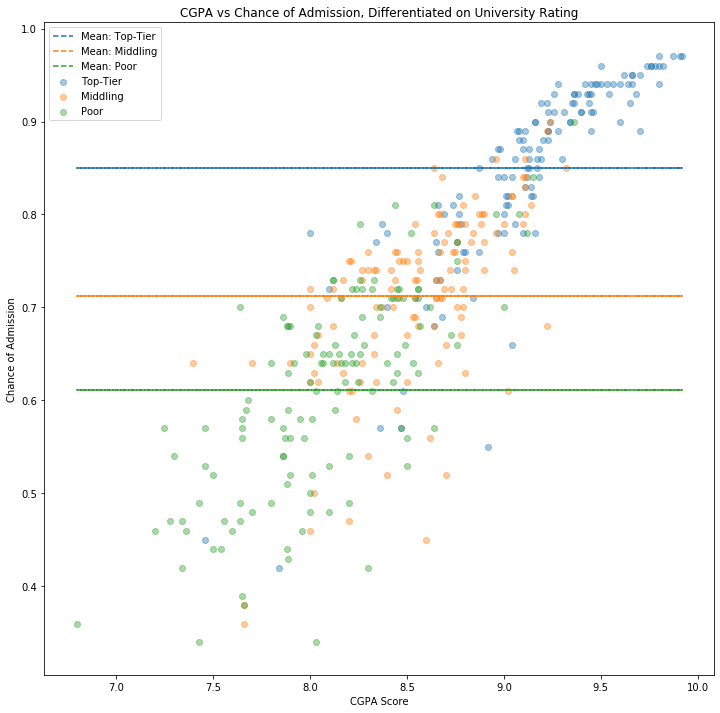

In [546]:
# Plot CGPA vs Chance of Admit, broken up by University Rating
fig,ax = plt.subplots(figsize=(12,12))

# Plot the data by grouping University Rating into three categories 
plt.scatter(data[data['University Rating'] > 3].CGPA, data[data['University Rating'] > 3]['Chance of Admit'], alpha = .4, label = 'Top-Tier')
plt.scatter(data[data['University Rating'] == 3].CGPA, data[data['University Rating'] == 3]['Chance of Admit'], alpha = .4, label = 'Middling')
plt.scatter(data[data['University Rating'] < 3].CGPA, data[data['University Rating'] < 3]['Chance of Admit'], alpha = .4, label = 'Poor')

# Calculate averages and plot the average lines
y_mean = [np.mean(data[data['University Rating'] > 3]['Chance of Admit'])]*len(data['Chance of Admit'])
y_mean2 = [np.mean(data[data['University Rating'] == 3]['Chance of Admit'])]*len(data['Chance of Admit'])
y_mean3 = [np.mean(data[data['University Rating'] < 3]['Chance of Admit'])]*len(data['Chance of Admit'])

mean_line = ax.plot(data.CGPA,y_mean, label='Mean: Top-Tier', linestyle='--')
mean_line2 = ax.plot(data.CGPA, y_mean2, label='Mean: Middling', linestyle = '--')
mean_line_3 = ax.plot(data.CGPA, y_mean3, label = 'Mean: Poor', linestyle = '--')

legend = plt.legend(loc='upper left')
plt.title('CGPA vs Chance of Admission, Differentiated on University Rating')
plt.xlabel('CGPA Score')
plt.ylabel('Chance of Admission')

### On average, students at poor Universities are clustered in the bottom-left of the chart which corresponds to low CGPA score and low chance of admission. As the University rating gets better, the average student move up and to the right: better CGPA score and higher chance of admission.

### Finally, let's examine the relationship between GRE Score and CGPA to see if students with good GPAs scored well on the GRE.

Text(0, 0.5, 'GRE Score')

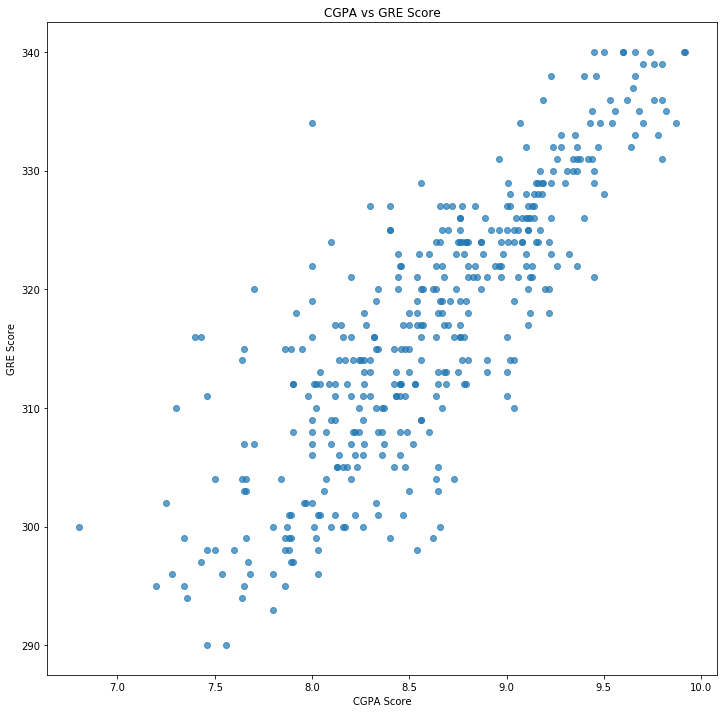

In [547]:
fig = plt.figure(figsize=(12,12))
plt.scatter(data['CGPA'], data['GRE Score'], alpha = .7)
plt.title('CGPA vs GRE Score')
plt.xlabel('CGPA Score')
plt.ylabel('GRE Score')

### For the most part, students with high GPAs scored well on the GRE. However, we can see some students with low GPA scores that scored relatively high on the GRE. Let's look at those students separately and see if there is anything interesting about them.

In [548]:
# Select students 1 standard deviations below the mean cgpa
lowcgpa = data[data.CGPA < (np.mean(data.CGPA) - (np.std(data.CGPA)))]

# Now I isolate the students with lowcgpa that also scored above average on the GRE.
lowcgpa_highgre = lowcgpa[lowcgpa['GRE Score'] > data['GRE Score'].mean()]

In [550]:
# I calculate the averages for all variables for two groups of students (low cgpa and high gre students, and all students)
# and put this in a dataframe
compare_df = pd.DataFrame(lowcgpa_highgre.mean()[1:], columns = ['Low CGPA High GRE Average'])

# Then I add second group to the dataframe, also calculating their mean
compare_df['Overall Average'] = data.mean()

# Then I calculate the difference between the gwo groups
compare_df['Difference'] = compare_df['Low CGPA High GRE Average'] - compare_df['Overall Average']

In [551]:
compare_df

,Low CGPA High GRE Average,Overall Average,Difference
GRE Score,322.600,316.807500,5.792500
TOEFL Score,108.200,107.410000,0.790000
University Rating,3.000,3.087500,-0.087500
SOP,3.600,3.400000,0.200000
LOR,3.300,3.452500,-0.152500
CGPA,7.924,8.598925,-0.674925
Research,0.600,0.547500,0.052500
Chance of Admit,0.682,0.724350,-0.042350


### Nothing seems striking about these low-CGPA, high-GRE students. The difference between their averages and overall averages are very small. The table above makes me think that the 'Chance of Admit' is formulaic, depending on some combination of the other variables. I will find some students with the exact same scores and see if they have the same 'Chance of Admit' as a check to see if this is formulaic.

In [585]:
# group together any students with the same scores on GRE, TOEFL, University Rating, Research, SOP, and LOR
# Note: if I include CGPA there are not identical groups or pairs of students, so I exclude this variable.
grouped = data.groupby(['GRE Score', 'TOEFL Score', 'University Rating', 'Research', 'SOP', 'LOR']).count() 

# max count of number of groups. 1 would mean no two share the same scores
grouped.max() 

Serial No.         2
CGPA               2
Chance of Admit    2
dtype: int64

In [581]:
# We know the max number of students with the exact same scores across the dimensions mentioned above is 2.
# However, we dont' know how many groups of two there are. Let's filter the dataframe to see how many identical groups of 
# 2 tehre are.
maxcount = grouped['Chance of Admit'] == 2 
grouped[maxcount]

,,,,,,Serial No.,CGPA,Chance of Admit
GRE Score,TOEFL Score,University Rating,Research,SOP,LOR,,,
314,107,2,0,2.5,4.0,2,2,2
315,105,3,0,2.0,2.5,2,2,2
321,109,4,1,4.0,4.0,2,2,2
326,112,3,1,3.5,3.0,2,2,2
329,111,4,1,4.5,4.0,2,2,2
332,118,5,1,5.0,5.0,2,2,2
335,117,5,1,5.0,5.0,2,2,2
340,120,5,1,4.5,4.5,2,2,2


In [582]:
# I will see what the 'Chance of Admit' score is for one group of the near-identical ratings,
# the first row in teh dataframe above. I need to select out of the original dataframe using the scores shown in the 
# dataframe directly above.
sames = data[(data['GRE Score'] == 340) & (data['University Rating'] == 5) & (data['TOEFL Score'] == 120)]
sames

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
25,26,340,120,5,4.5,4.5,9.60,1,0.94
202,203,340,120,5,4.5,4.5,9.91,1,0.97


### Only difference is .31 in their CGPA. Almost an identical difference in their Chance of Admit

In [583]:
# I will see what the 'Chance of Admit' score is for another group of the near-identical ratings
sames2 = data[(data['GRE Score'] == 314) & (data['University Rating'] == 2) & (data['TOEFL Score'] == 107) & (data['Research'] == 0)]
sames2

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
244,245,314,107,2,2.5,4.0,8.56,0,0.63
322,323,314,107,2,2.5,4.0,8.27,0,0.72


### Only difference is .29 in their CGPA, but person with lower CGPA has a higher chance of Admit. This means that Chance of Admit is not formulaic, or if it is we do not have complete information. 

### Why could someone have a lower chance of admit if they have the same or better scores than someone else?

In [584]:
sames3 = data[(data['GRE Score'] == 326) & (data['University Rating'] == 3) & (data['TOEFL Score'] == 112) & (data['Research'] == 1)]
sames3

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
104,105,326,112,3,3.5,3.0,9.05,1,0.74
128,129,326,112,3,3.5,3.0,9.10,1,0.84


### Only a difference of .05 in their CGPA, but of .1 in their Chance of Admit.

In [557]:
print("The two students have identical scores excpet CGPA. They are",round((9.1-9.05)/np.std(data.CGPA),3), "standard deviations away from each other for CGPA, but", round((.84-.74)/np.std(data['Chance of Admit']),3), "for chance of admit.")

The two students have identical scores excpet CGPA. They are 0.084 standard deviations away from each other for CGPA, but 0.702 for chance of admit.
